# CO543 - Image Processing Lab 03
### E/17/297

In [77]:
folder = "/content/drive/MyDrive/CO543/Lab 3/"

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg


### 1. Apply Mean filtering with mask size 3x3 and 5x5


In [79]:
# Read the image
img = cv2.imread(folder + 'Sample image.jpg', 0)
#cv2_imshow(img)

In [80]:
# Function to apply 3x3 mean filtering
def meanFilter3x3(img):
  height,width = img.shape[:2]
  meanImg = np.copy(img)

  filter = np.ones((3,3)) / 9

  #zero pading added image
  paddedImg = np.zeros((height+2,width+2))
  paddedImg[1:height+1, 1:width+1] = img

  for row in range(height):
    for col in range(width):
      neighborHood = paddedImg[row:row+3, col:col+3]
      calculatedPixel = np.sum(filter*neighborHood)

      if calculatedPixel < 0:
        calculatedPixel = 0
      if calculatedPixel > 255:
        calculatedPixel = 255

      meanImg[row, col] = round(calculatedPixel)
  
  return meanImg



  

(-0.5, 383.5, 255.5, -0.5)

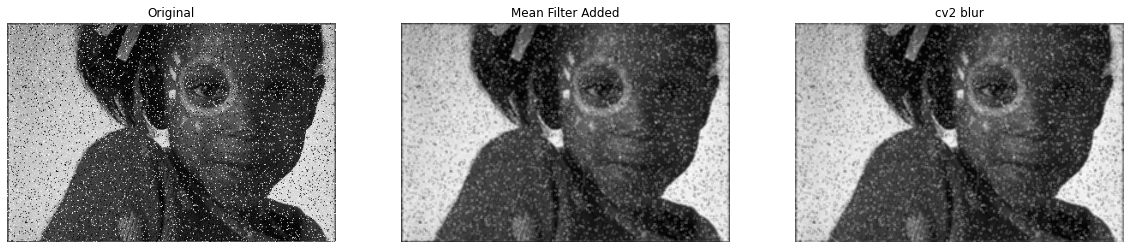

In [81]:

blur = cv2.blur(img,(3,3))
mean_img = meanFilter3x3(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(mean_img, cmap ="gray")
ax[1].set_title("Mean Filter Added")
ax[1].axis('off')

#cv2 blur
ax[2].imshow(blur, cmap ="gray")
ax[2].set_title("cv2 blur")
ax[2].axis('off')



Text(0.5, 1.0, 'Mean filter 3x3 ')

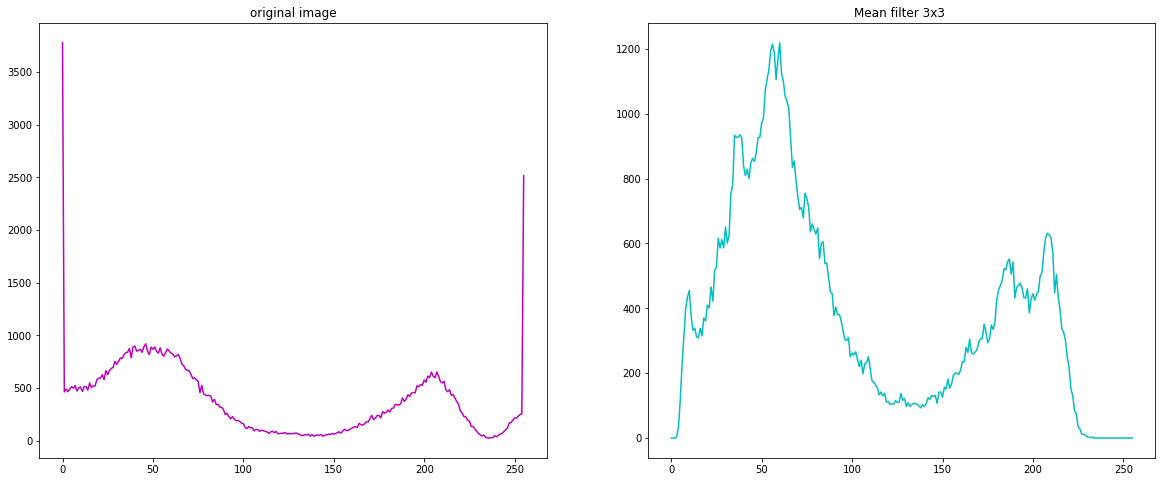

In [83]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([mean_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Mean filter 3x3 ")

In [6]:
# Function to apply 5x5 mean filtering
def meanFilter5x5(img):
  height,width = img.shape[:2]
  meanImg = np.copy(img)

  filter = np.ones((5,5)) / 25

  for row in range(height-4):
    for col in range(width-4):
      neighborHood = img[row:row+5, col:col+5]
      meanImg[row+2, col+2] = np.sum(filter*neighborHood)
  
  return meanImg



  

(-0.5, 383.5, 255.5, -0.5)

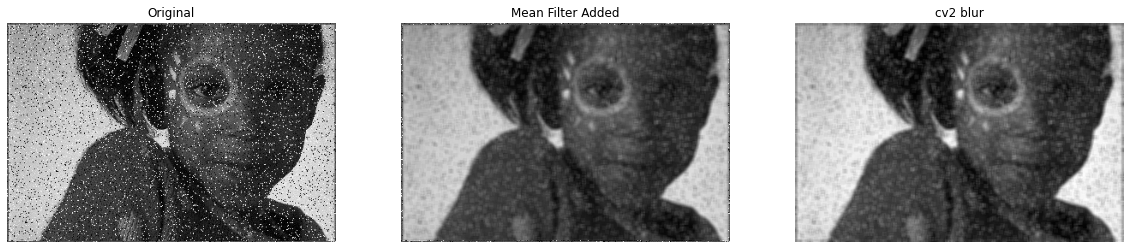

In [7]:
blur = cv2.blur(img,(5,5))
mean_img = meanFilter5x5(img)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(mean_img, cmap ="gray")
ax[1].set_title("Mean Filter Added")
ax[1].axis('off')

#cv2 blur
ax[2].imshow(blur, cmap ="gray")
ax[2].set_title("cv2 blur")
ax[2].axis('off')



Text(0.5, 1.0, 'Mean filter 5x5 ')

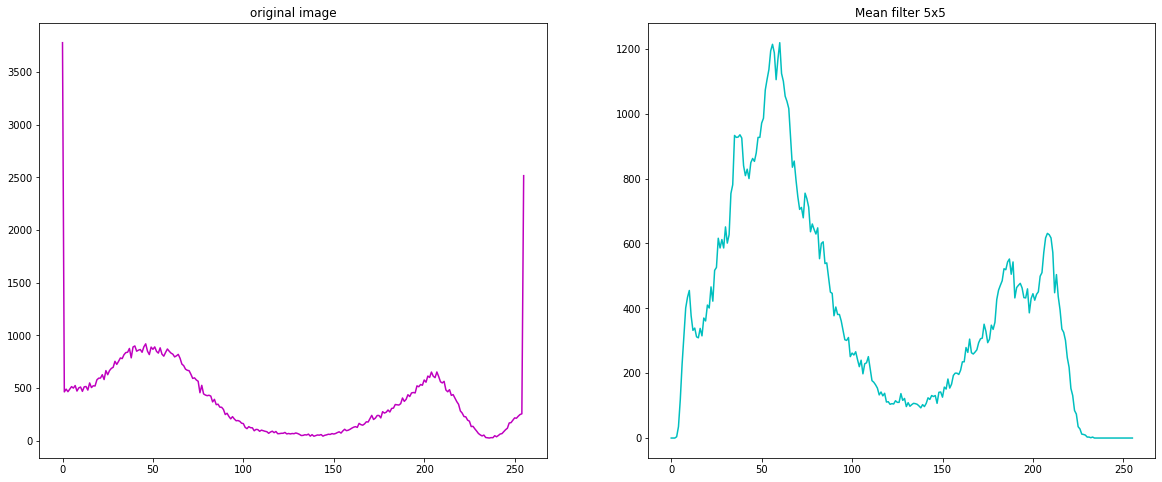

In [84]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([mean_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Mean filter 5x5 ")

In [8]:
# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('Lab 3.ipynb',folder)

### 2. Apply Highpass filtering with mask size 3x3 and 5x5

In [85]:
img = cv2.imread(folder + 'Sample image.jpg', 0)

#3x3 mask
kernel = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

#add filter to image
result_img = cv2.filter2D(img, -1, kernel)



(-0.5, 383.5, 255.5, -0.5)

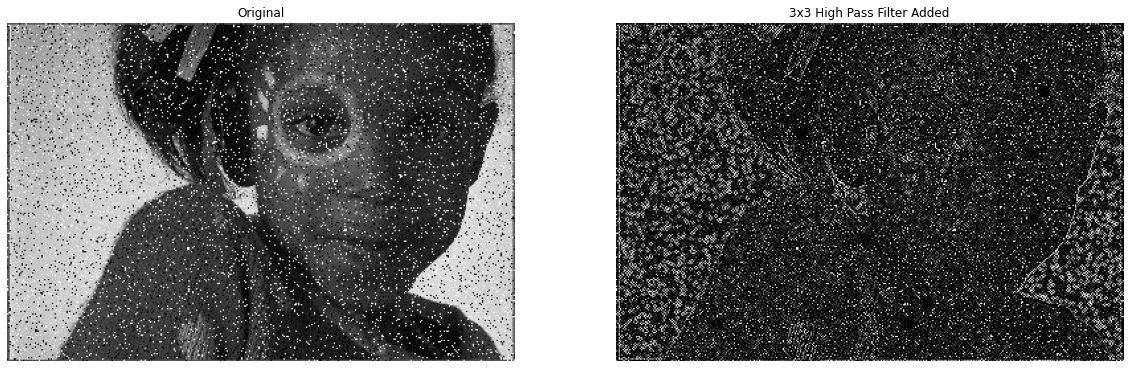

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("3x3 High Pass Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'High Pass Filter 3x3 ')

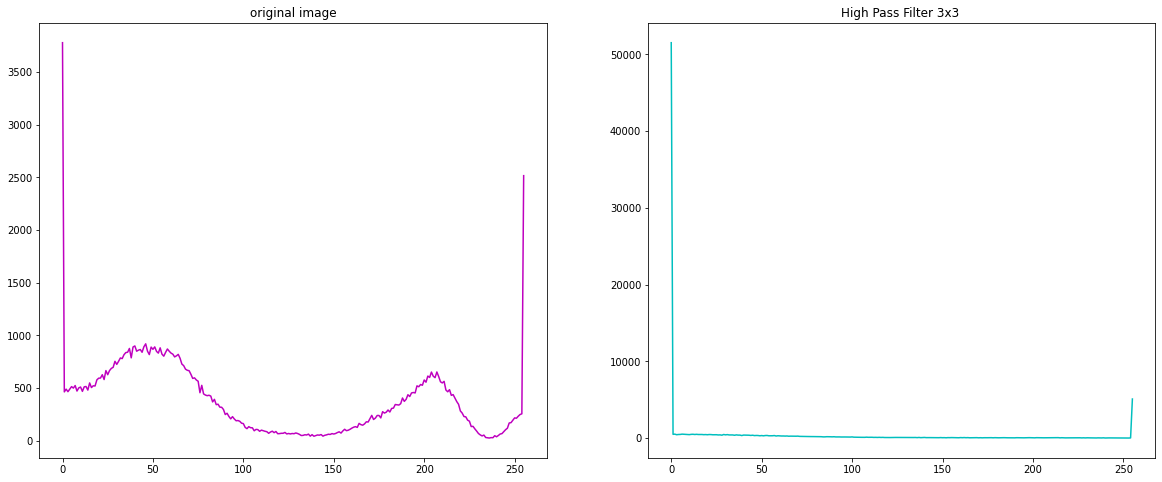

In [87]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("High Pass Filter 3x3 ")

In [88]:
img = cv2.imread(folder + 'Sample image.jpg', 0)

#5x5 mask
kernel = np.array([[-1.0, -1.0, -1.0, -1.0, -1.0], 
                   [-1.0, -1.0, 4.0, -1.0, -1.0],
                   [-1.0, 4.0, 4.0, 4.0, -1.0],
                   [-1.0, -1.0, 4.0, -1.0, -1.0],
                   [-1.0, -1.0, -1.0, -1.0, -1.0]])


#add filter to image
result_img = cv2.filter2D(img, -1, kernel)


(-0.5, 383.5, 255.5, -0.5)

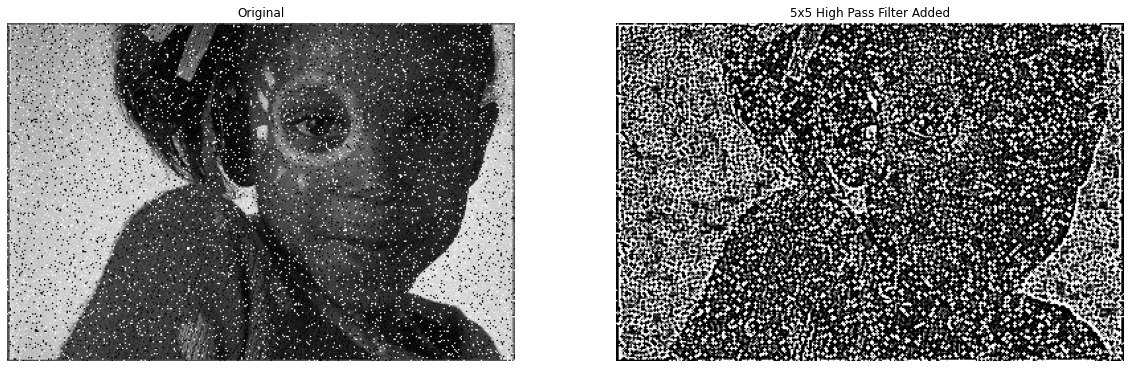

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("5x5 High Pass Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'High Pass Filter 5x5 ')

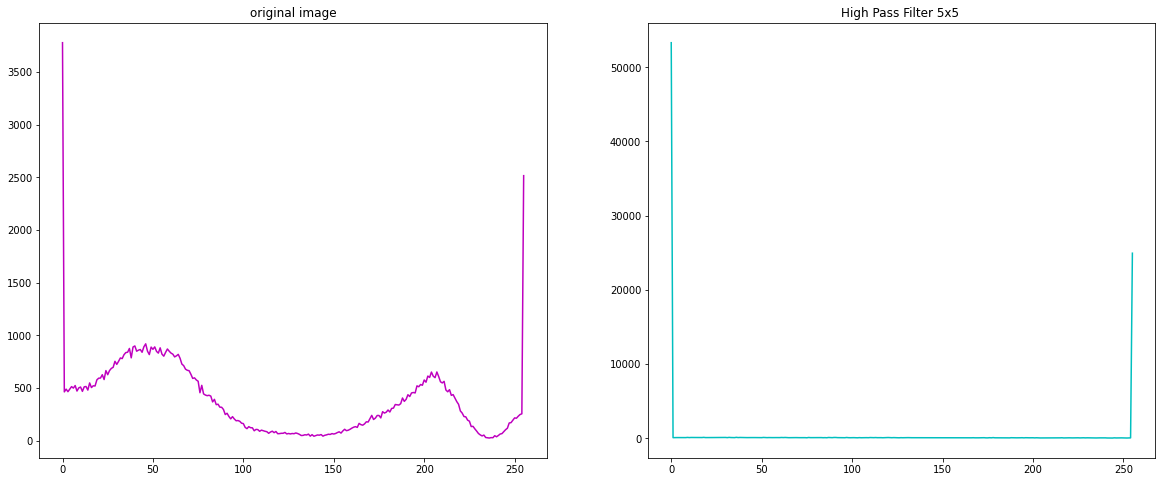

In [91]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("High Pass Filter 5x5 ")

### 3. Apply lowpass filtering with mask size 3x3 and 5x5


In [101]:
img = cv2.imread(folder + 'Sample image.jpg', 0)

#3x3 mask
kernel = np.ones((3, 3), np.float32) / 9

#add filter to image
result_img = cv2.filter2D(img, -1, kernel)


(-0.5, 383.5, 255.5, -0.5)

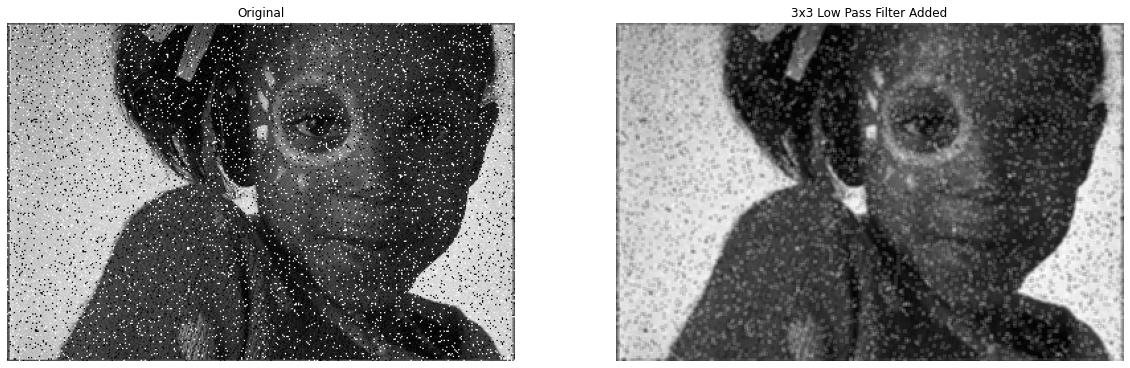

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("3x3 Low Pass Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'Low Pass Filter 3x3 ')

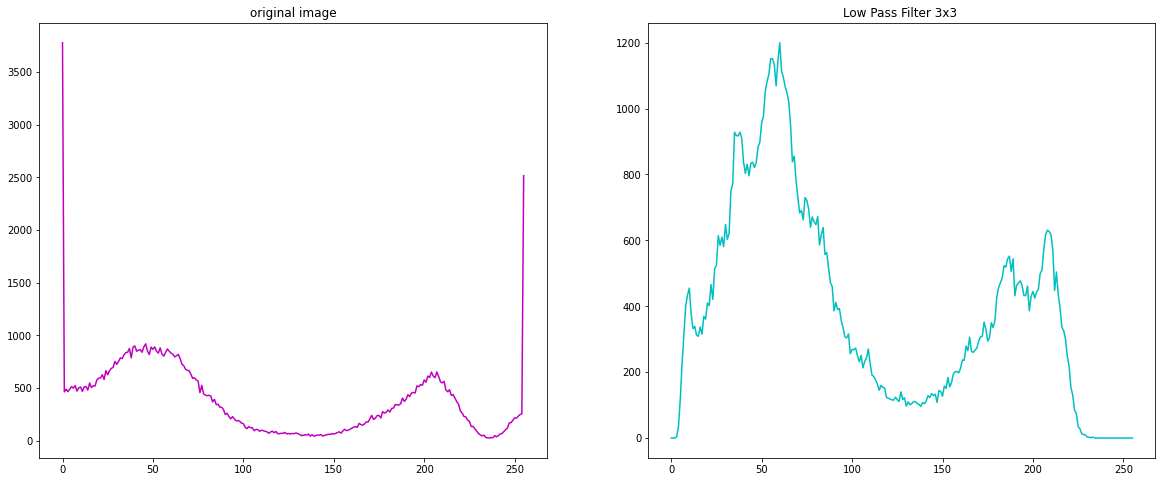

In [103]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Low Pass Filter 3x3 ")

In [104]:
img = cv2.imread(folder + 'Sample image.jpg', 0)

#5x5 mask
kernel = np.ones((5, 5), np.float32) / 25

#add filter to image
result_img = cv2.filter2D(img, -1, kernel)


(-0.5, 383.5, 255.5, -0.5)

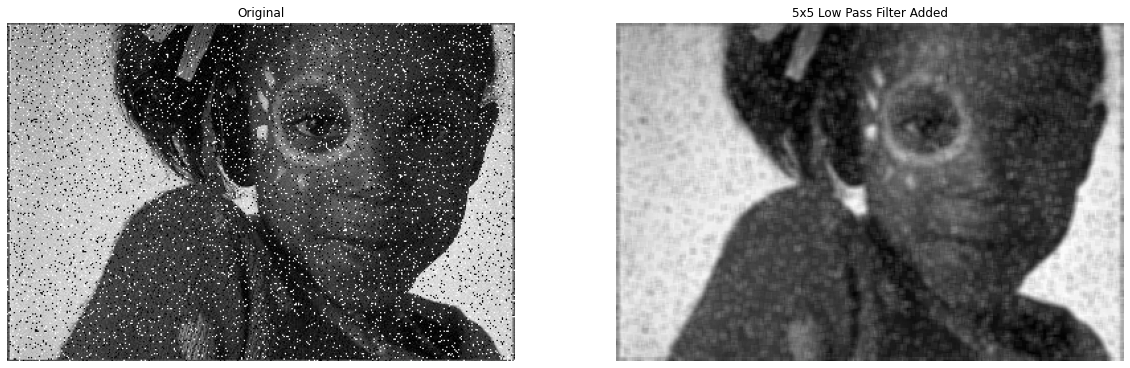

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("5x5 Low Pass Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'Low Pass Filter 5x5 ')

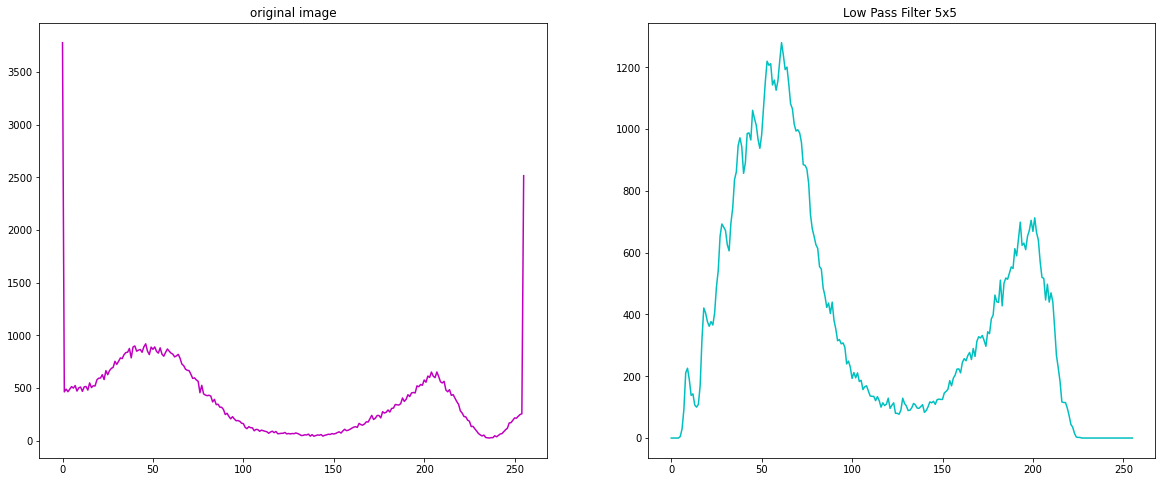

In [106]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Low Pass Filter 5x5 ")

Text(0.5, 1.0, 'Low Pass Filter 5x5 ')

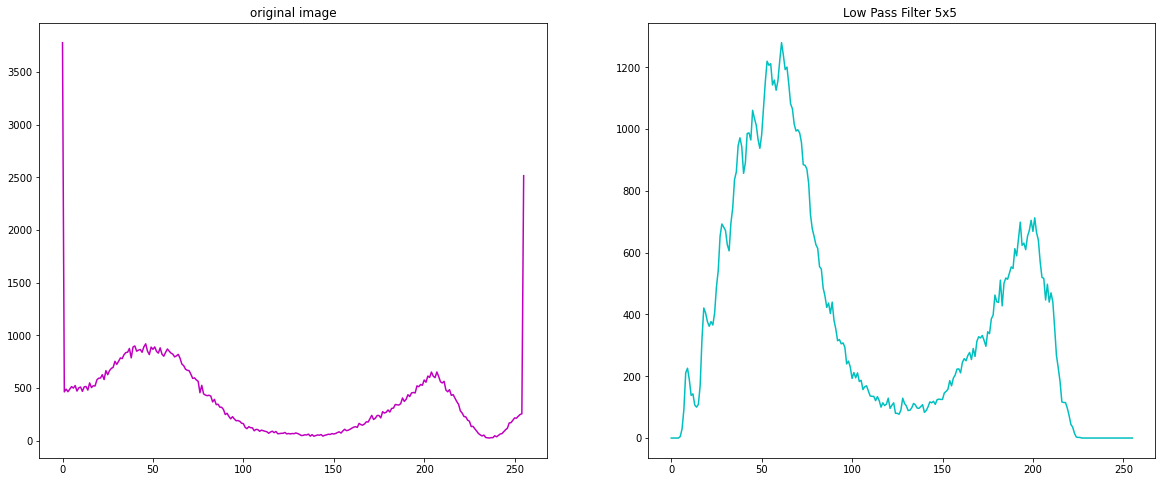

In [100]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Low Pass Filter 5x5 ")

### 4. A bilateral filter with mask size 5 × 5 with appropriate values of σ and , set 2 d σr 2 through experimentation.


In [107]:
#apply bilateral filter
result_img = cv2.bilateralFilter(img, 5, 60, 90)

(-0.5, 383.5, 255.5, -0.5)

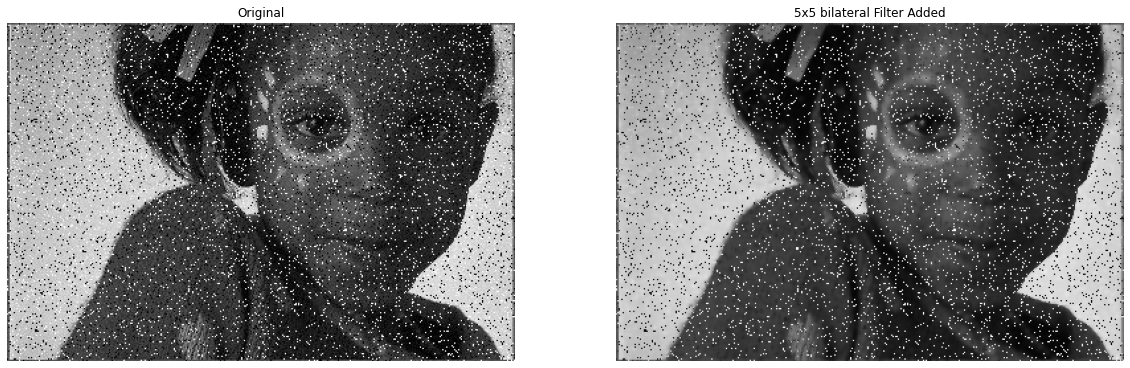

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("5x5 bilateral Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'bilateral Filter Added')

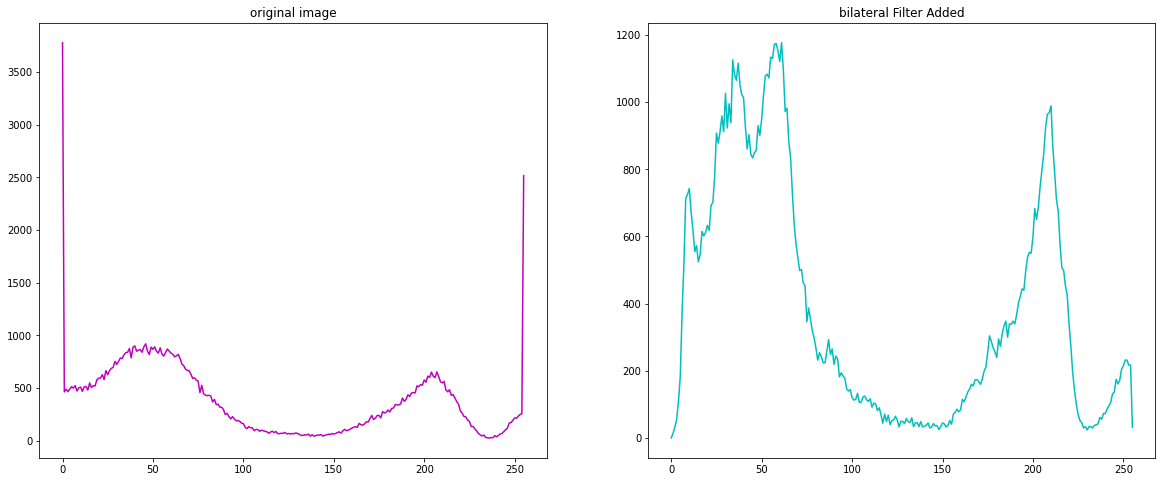

In [109]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("bilateral Filter Added")

### 5. A Gaussian filter with mask size 5 × 5 appropriate values of σ .


In [110]:
sigma = 1

result_img = cv2.GaussianBlur(img, (5,5), sigma)

(-0.5, 383.5, 255.5, -0.5)

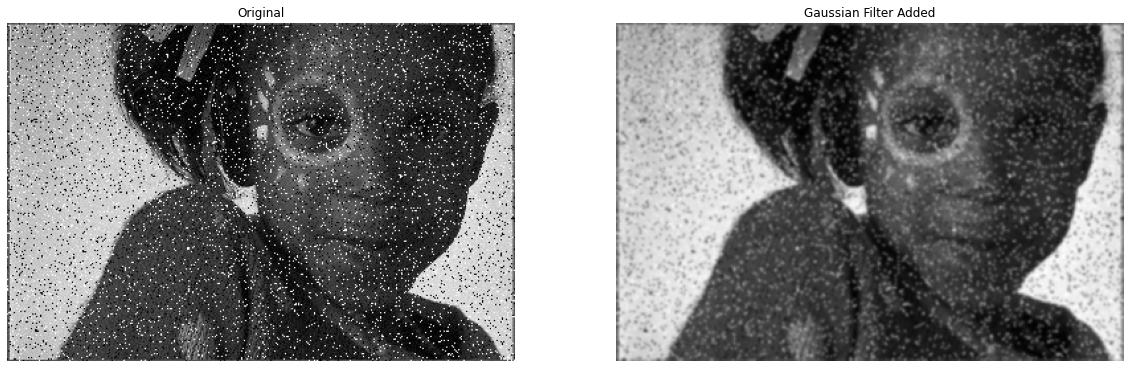

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("Gaussian Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'Gaussian filter Added')

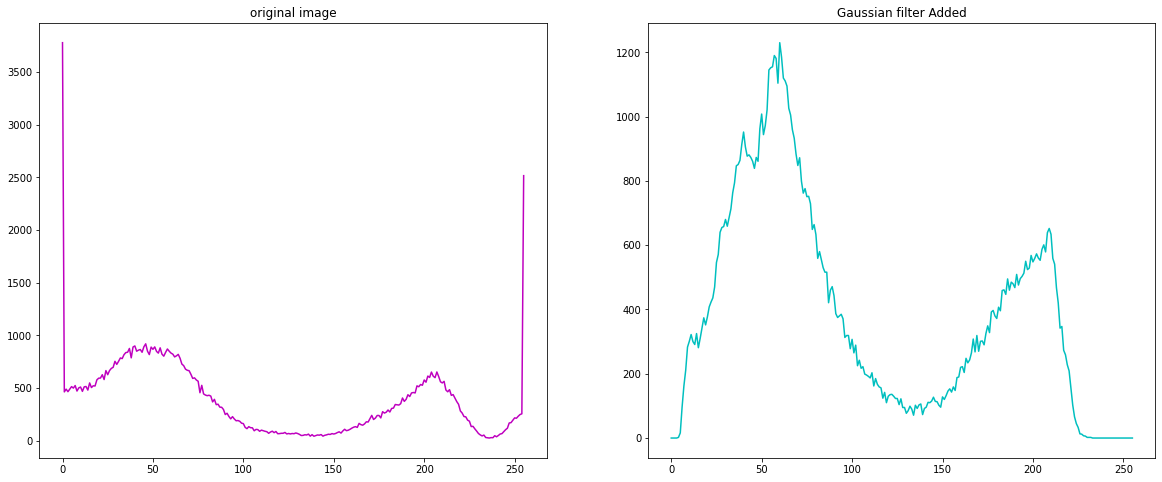

In [112]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Gaussian filter Added")

### 6. A laplacian filter with mask size 5 × 5 appropriate values of σ .


In [113]:
img = cv2.imread(folder + 'tajmahal.jpg', 0)

result_img =  cv2.Laplacian(img, ddepth = cv2.CV_8U, ksize=5)

(-0.5, 725.5, 483.5, -0.5)

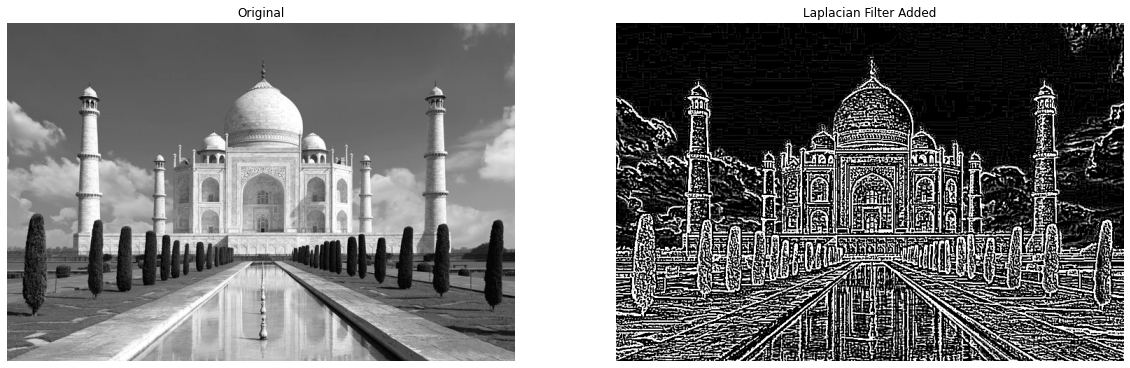

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("Laplacian Filter Added")
ax[1].axis('off')



Text(0.5, 1.0, 'laplacian filter Added')

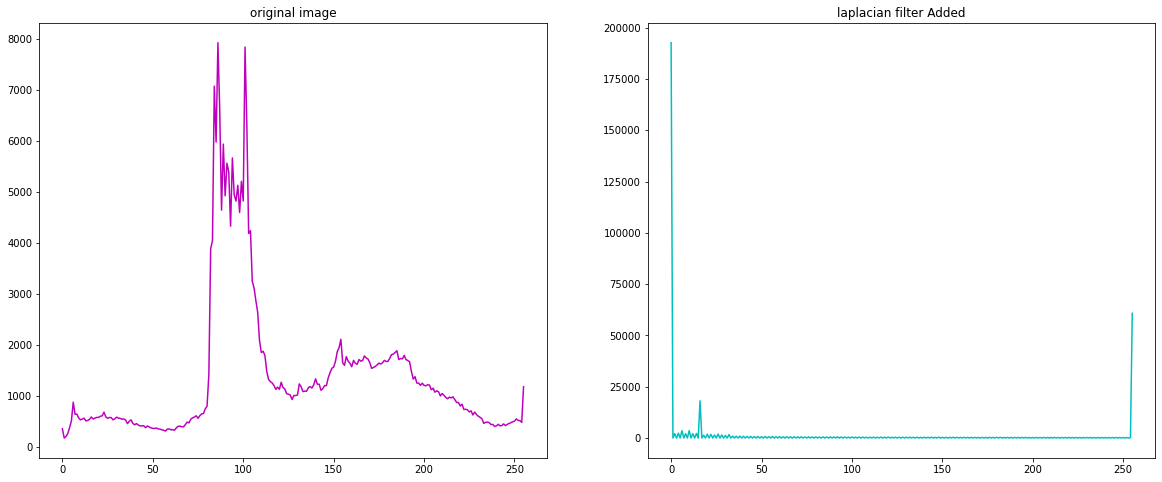

In [115]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("laplacian filter Added")

### 7. A median filter of appropriate window size. Verify your implementation with OpenCV filtering functions.

In [116]:
# function to apply median filter
def medianFilter(img):
  height,width = img.shape[:2]
  medianImg = np.copy(img)

  #zero pading added image
  paddedImg = np.zeros((height+2,width+2))
  paddedImg[1:height+1, 1:width+1] = img

  for row in range(height):
    for col in range(width):
      # 3x3 matrix conataining neighbourhood
      neighborHood = paddedImg[row:row+3, col:col+3]
      
      # convert to 1D
      flatterned = neighborHood.flatten()

      # sort 
      flatterned.sort()

      medianImg[row, col] = flatterned[round(len(flatterned)/2)]
  
  return medianImg



  

(-0.5, 383.5, 255.5, -0.5)

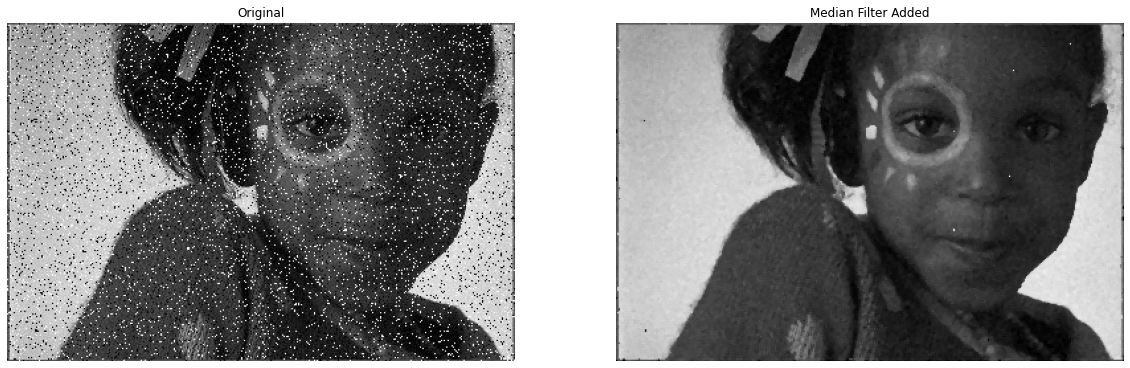

In [117]:
img = cv2.imread(folder + 'Sample image.jpg', 0)

result_img = medianFilter(img)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (20,15))

#original image
ax[0].imshow(img, cmap ="gray")
ax[0].set_title("Original")
ax[0].axis('off')

#mean filter added image
ax[1].imshow(result_img, cmap ="gray")
ax[1].set_title("Median Filter Added")
ax[1].axis('off')

Text(0.5, 1.0, 'Median Filter Added')

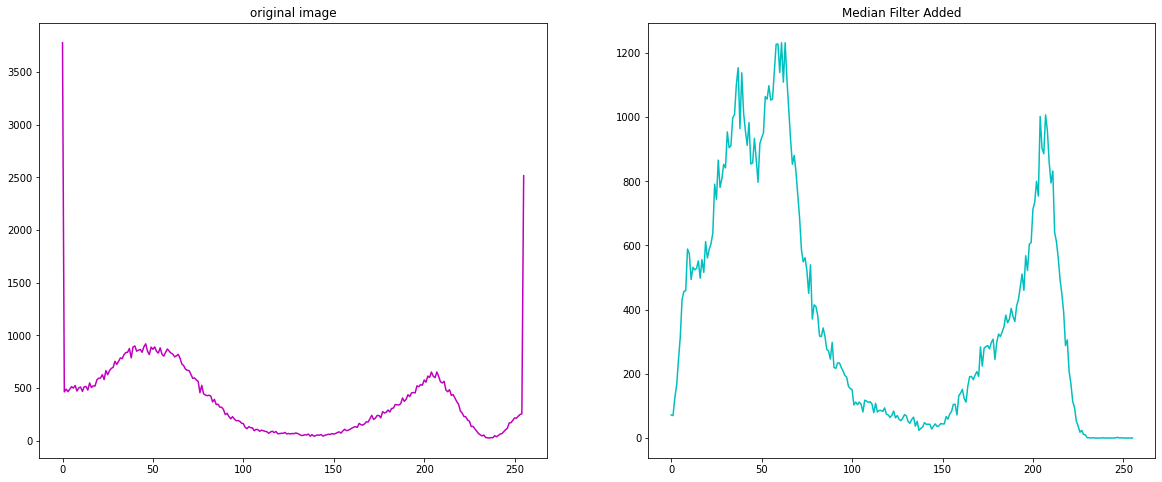

In [118]:
#histogram values for original image
hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
#histogram values for equalized image
hist_eq = cv2.calcHist([result_img], [0], None, [256], [0,256])

# plot the histogram
x = np.arange(256)
fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
axis[0].plot(x,hist_org,color='m')
axis[0].set_title("original image")

axis[1].plot(x,hist_eq,color='c')
axis[1].set_title("Median Filter Added")